## CalmWave Take-Home Assessment

In [45]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### Data

Read in data and get rid of any unneeded columns or rows.

In [2]:
df = pd.read_csv("datascience_interview_data_fixed.csv")
print(df.shape)
df.head()

(574440, 9)


,Unnamed: 0,SUBJECT_ID,TIME_FROM_ADMITTANCE_IN_MINUTES,HEART_RATE_VALUE,HEART_RATE_THRESHOLD_VALUE_LOW,HEART_RATE_THRESHOLD_VALUE_HIGH,BLOOD_PRESSURE_SYSTOLIC_VALUE,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_LOW,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_HIGH
0,0,355968,1213.0,62,50.0,120.0,NaN,NaN,NaN
1,1,355968,2051.0,59,60.0,120.0,NaN,NaN,NaN
2,2,355968,2239.0,70,50.0,120.0,NaN,NaN,NaN
3,3,355968,2219.0,69,50.0,120.0,NaN,NaN,NaN
4,4,355968,1946.0,71,60.0,120.0,NaN,NaN,NaN


In [3]:
# drop unknown column b/c it's not in the table schema
df = df.drop(["Unnamed: 0"], axis = 1)
print(df.shape)
df.head()

(574440, 8)


,SUBJECT_ID,TIME_FROM_ADMITTANCE_IN_MINUTES,HEART_RATE_VALUE,HEART_RATE_THRESHOLD_VALUE_LOW,HEART_RATE_THRESHOLD_VALUE_HIGH,BLOOD_PRESSURE_SYSTOLIC_VALUE,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_LOW,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_HIGH
0,355968,1213.0,62,50.0,120.0,NaN,NaN,NaN
1,355968,2051.0,59,60.0,120.0,NaN,NaN,NaN
2,355968,2239.0,70,50.0,120.0,NaN,NaN,NaN
3,355968,2219.0,69,50.0,120.0,NaN,NaN,NaN
4,355968,1946.0,71,60.0,120.0,NaN,NaN,NaN


### Data Checks

Check for missing values and for data types. Get a sense of the data distributions.

In [4]:
df.isnull().sum() / df.shape[0]

SUBJECT_ID                                      0.000000
TIME_FROM_ADMITTANCE_IN_MINUTES                 0.000000
HEART_RATE_VALUE                                0.000000
HEART_RATE_THRESHOLD_VALUE_LOW                  0.000000
HEART_RATE_THRESHOLD_VALUE_HIGH                 0.000000
BLOOD_PRESSURE_SYSTOLIC_VALUE                   0.566056
BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_LOW     0.566066
BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_HIGH    0.566066
dtype: float64

In [5]:
df.dtypes

SUBJECT_ID                                        int64
TIME_FROM_ADMITTANCE_IN_MINUTES                 float64
HEART_RATE_VALUE                                  int64
HEART_RATE_THRESHOLD_VALUE_LOW                  float64
HEART_RATE_THRESHOLD_VALUE_HIGH                 float64
BLOOD_PRESSURE_SYSTOLIC_VALUE                   float64
BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_LOW     float64
BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_HIGH    float64
dtype: object

In [6]:
len(df["SUBJECT_ID"].unique())

98

In [7]:
df.describe()

,SUBJECT_ID,TIME_FROM_ADMITTANCE_IN_MINUTES,HEART_RATE_VALUE,HEART_RATE_THRESHOLD_VALUE_LOW,HEART_RATE_THRESHOLD_VALUE_HIGH,BLOOD_PRESSURE_SYSTOLIC_VALUE,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_LOW,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_HIGH
count,574440.000000,574440.000000,574440.000000,574440.000000,574440.000000,249275.000000,249269.000000,249269.000000
mean,511243.193256,8813.539539,90.489562,57.699424,124.417720,124.629498,85.058912,151.649250
std,290672.729461,9509.715109,20.593965,8.075329,33.782355,24.665871,15.890979,30.950769
min,12778.000000,0.000000,0.000000,6.000000,55.000000,26.000000,50.000000,55.000000
25%,255718.000000,1622.000000,76.000000,55.000000,120.000000,106.000000,80.000000,135.000000
50%,520549.000000,5019.000000,89.000000,60.000000,120.000000,123.000000,90.000000,160.000000
75%,731195.000000,13095.000000,105.000000,60.000000,125.000000,142.000000,90.000000,165.000000
max,969834.000000,44136.000000,194.000000,150.000000,1210.000000,260.000000,140.000000,240.000000


### Data Preparation

Prepare the data for analysis.

In [8]:
df = df.sort_values(["SUBJECT_ID", "TIME_FROM_ADMITTANCE_IN_MINUTES"]).reset_index(drop = True)
print(df.shape)
df.head()

(574440, 8)


,SUBJECT_ID,TIME_FROM_ADMITTANCE_IN_MINUTES,HEART_RATE_VALUE,HEART_RATE_THRESHOLD_VALUE_LOW,HEART_RATE_THRESHOLD_VALUE_HIGH,BLOOD_PRESSURE_SYSTOLIC_VALUE,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_LOW,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_HIGH
0,12778,0.0,93,60.0,120.0,NaN,NaN,NaN
1,12778,39.0,90,60.0,120.0,159.0,90.0,160.0
2,12778,40.0,91,60.0,120.0,NaN,NaN,NaN
3,12778,41.0,91,60.0,120.0,NaN,NaN,NaN
4,12778,42.0,88,60.0,120.0,NaN,NaN,NaN


Take `SUBJECT_ID` == 12778 as an example and examine `TIME_FROM_ADMITTANCE_IN_MINUTES`. Seems like not all minutes are accounted for in the data. There are 1755 observations for this subject, but they were in the ICU for 1886 minutes. Does this happen often? Yes, this applies to around 96% of the subjects.

In [9]:
df[df["SUBJECT_ID"] == 12778]["TIME_FROM_ADMITTANCE_IN_MINUTES"].describe()

count    1755.000000
mean      947.597151
std       534.800417
min         0.000000
25%       485.500000
50%       936.000000
75%      1405.500000
max      1886.000000
Name: TIME_FROM_ADMITTANCE_IN_MINUTES, dtype: float64

In [10]:
not_complete = 0
for s in df["SUBJECT_ID"].unique():
    # add 1 to account for the 0th minute
    if len(df[df["SUBJECT_ID"] == s]["TIME_FROM_ADMITTANCE_IN_MINUTES"].unique()) != df[df["SUBJECT_ID"] == s]["TIME_FROM_ADMITTANCE_IN_MINUTES"].max() + 1:
        not_complete += 1
        
not_complete / len(df["SUBJECT_ID"].unique())

0.9693877551020408

I chose not to impute the values for these missing minutes because my approach would be to replace the missing minute(s) with the heart rate or blood pressure value from the last available minute, which would be incorrect and naive. My assumption here is that a subject's heart rate/blood pressure can vary quite a bit from minute to minute, as seen in the charts below.

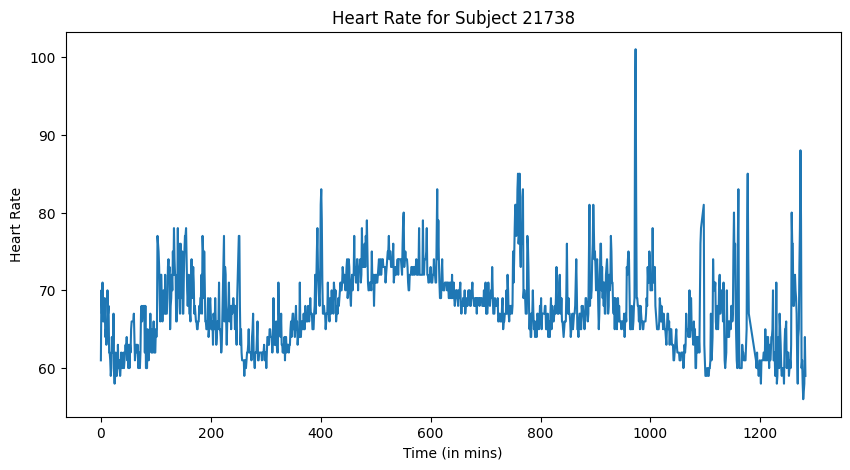

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.plot(df[df["SUBJECT_ID"] == 21738][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_VALUE"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.set_xlabel("Time (in mins)")
ax.set_ylabel("Heart Rate")
ax.set_title("Heart Rate for Subject 21738")
plt.show()

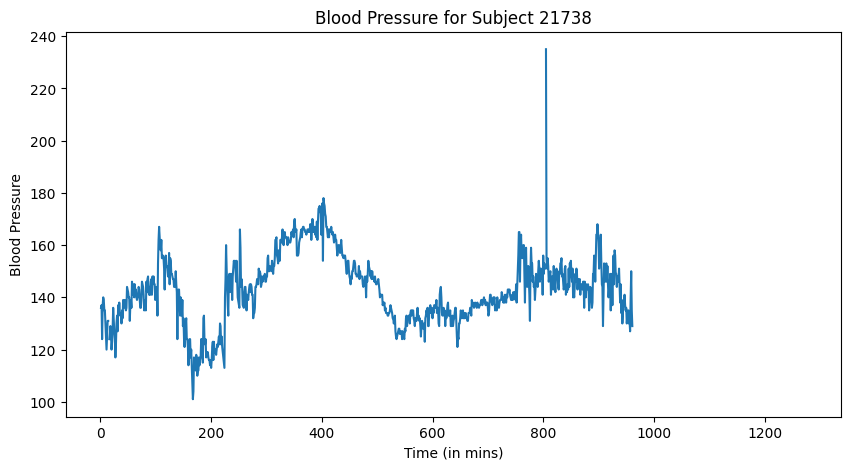

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.plot(df[df["SUBJECT_ID"] == 21738][["TIME_FROM_ADMITTANCE_IN_MINUTES", "BLOOD_PRESSURE_SYSTOLIC_VALUE"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.set_xlabel("Time (in mins)")
ax.set_ylabel("Blood Pressure")
ax.set_title("Blood Pressure for Subject 21738")
plt.show()

For this analysis, I chose to focus solely on heart rate to determine volatile or not volatile breach. Over 50% of the data for blood pressure are missing, so I would like to refrain from relying too much on blood pressure to draw conclusions for heart rate. Blood pressure could be examined in the future, but I would like to understand why so much of the data are missing before doing so.

### Data Analysis

Subject 21738 crosses the lower threshold for heart rate quite a bit in the first 100 minutes, but it is quite volatile and their heart rate doesn't stay consistently below the threshold for very long nor does it continue to decline far below the threshold.

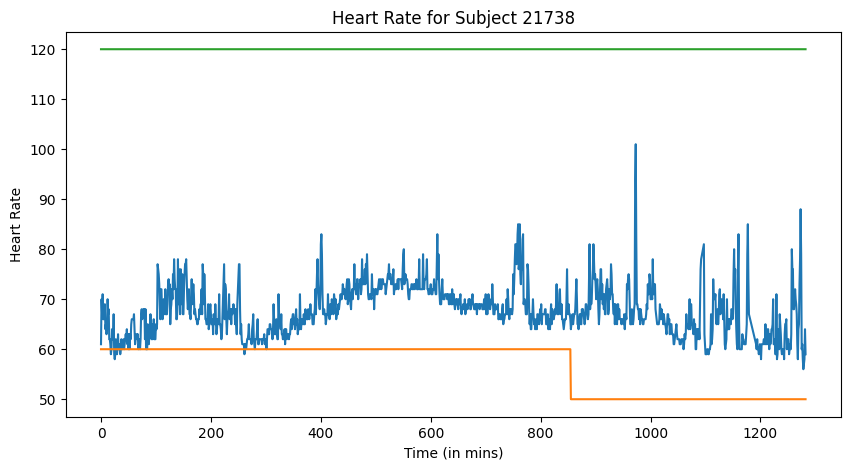

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.plot(df[df["SUBJECT_ID"] == 21738][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_VALUE"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.plot(df[df["SUBJECT_ID"] == 21738][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_THRESHOLD_VALUE_LOW"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.plot(df[df["SUBJECT_ID"] == 21738][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_THRESHOLD_VALUE_HIGH"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.set_xlabel("Time (in mins)")
ax.set_ylabel("Heart Rate")
ax.set_title("Heart Rate for Subject 21738")
plt.show()

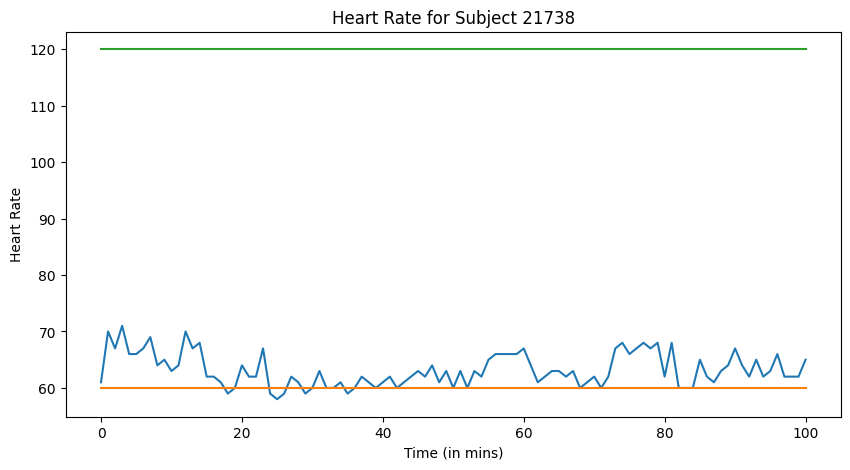

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.plot(df[(df["SUBJECT_ID"] == 21738) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] >= 0) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] <= 100)][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_VALUE"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.plot(df[(df["SUBJECT_ID"] == 21738) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] >= 0) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] <= 100)][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_THRESHOLD_VALUE_LOW"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.plot(df[(df["SUBJECT_ID"] == 21738) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] >= 0) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] <= 100)][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_THRESHOLD_VALUE_HIGH"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.set_xlabel("Time (in mins)")
ax.set_ylabel("Heart Rate")
ax.set_title("Heart Rate for Subject 21738")
plt.show()

### Data Enrichments

- Examine rolling window of 2 or 3 minutes. Could be used to determine whether average is going up or down.
- Calculated difference between consecutive rows (i.e. row_t+1 - row_t). Could be used to determine direction of heart rate and whether it is consistent or not.

In [13]:
# rolling window of 2 and 3 minutes
df["hr_rollavg_2"] = df.groupby(by = "SUBJECT_ID")["HEART_RATE_VALUE"].transform(lambda x: x.rolling(2, 2).mean())
df["hr_rollavg_3"] = df.groupby(by = "SUBJECT_ID")["HEART_RATE_VALUE"].transform(lambda x: x.rolling(3, 3).mean())
df.head()

,SUBJECT_ID,TIME_FROM_ADMITTANCE_IN_MINUTES,HEART_RATE_VALUE,HEART_RATE_THRESHOLD_VALUE_LOW,HEART_RATE_THRESHOLD_VALUE_HIGH,BLOOD_PRESSURE_SYSTOLIC_VALUE,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_LOW,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_HIGH,hr_rollavg_2,hr_rollavg_3
0,12778,0.0,93,60.0,120.0,NaN,NaN,NaN,NaN,NaN
1,12778,39.0,90,60.0,120.0,159.0,90.0,160.0,91.5,NaN
2,12778,40.0,91,60.0,120.0,NaN,NaN,NaN,90.5,91.333333
3,12778,41.0,91,60.0,120.0,NaN,NaN,NaN,91.0,90.666667
4,12778,42.0,88,60.0,120.0,NaN,NaN,NaN,89.5,90.000000


In [14]:
# difference between consecutive rows
df["hr_diff"] = df.groupby(by = "SUBJECT_ID")["HEART_RATE_VALUE"].diff().fillna(0)
df.head()

,SUBJECT_ID,TIME_FROM_ADMITTANCE_IN_MINUTES,HEART_RATE_VALUE,HEART_RATE_THRESHOLD_VALUE_LOW,HEART_RATE_THRESHOLD_VALUE_HIGH,BLOOD_PRESSURE_SYSTOLIC_VALUE,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_LOW,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_HIGH,hr_rollavg_2,hr_rollavg_3,hr_diff
0,12778,0.0,93,60.0,120.0,NaN,NaN,NaN,NaN,NaN,0.0
1,12778,39.0,90,60.0,120.0,159.0,90.0,160.0,91.5,NaN,-3.0
2,12778,40.0,91,60.0,120.0,NaN,NaN,NaN,90.5,91.333333,1.0
3,12778,41.0,91,60.0,120.0,NaN,NaN,NaN,91.0,90.666667,0.0
4,12778,42.0,88,60.0,120.0,NaN,NaN,NaN,89.5,90.000000,-3.0


In [15]:
#plot_acf(df[df["SUBJECT_ID"] == 21738][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_VALUE"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"), lags = 100);
#plot_pacf(df[df["SUBJECT_ID"] == 21738][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_VALUE"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"), lags = 100);

### Volatile vs. Non-volatile Breach

Use the difference between consecutive rows to determine volatile vs. non-volatile breach. First create an indicator for whether the heart rate passed the low or high threshold. Then, for the heart rate values that crossed the threshold, determine whether the next two heart rate readings also were directionally consistent. In other words, did the heart rate stay the same or continue dropping for low heart rate or did the heart rate stay the same or continue increasing for high heart rate. If so, categorize that has a non-volatile breach and categorize the others as a volatile breach.

In [16]:
# cross threshold indicator
df["hr_above_threshold"] = np.where(df["HEART_RATE_VALUE"] > df["HEART_RATE_THRESHOLD_VALUE_HIGH"], 1, 0)
df["hr_below_threshold"] = np.where(df["HEART_RATE_VALUE"] < df["HEART_RATE_THRESHOLD_VALUE_LOW"], 1, 0)
df.head()

,SUBJECT_ID,TIME_FROM_ADMITTANCE_IN_MINUTES,HEART_RATE_VALUE,HEART_RATE_THRESHOLD_VALUE_LOW,HEART_RATE_THRESHOLD_VALUE_HIGH,BLOOD_PRESSURE_SYSTOLIC_VALUE,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_LOW,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_HIGH,hr_rollavg_2,hr_rollavg_3,hr_diff,hr_above_threshold,hr_below_threshold
0,12778,0.0,93,60.0,120.0,NaN,NaN,NaN,NaN,NaN,0.0,0,0
1,12778,39.0,90,60.0,120.0,159.0,90.0,160.0,91.5,NaN,-3.0,0,0
2,12778,40.0,91,60.0,120.0,NaN,NaN,NaN,90.5,91.333333,1.0,0,0
3,12778,41.0,91,60.0,120.0,NaN,NaN,NaN,91.0,90.666667,0.0,0,0
4,12778,42.0,88,60.0,120.0,NaN,NaN,NaN,89.5,90.000000,-3.0,0,0


In [75]:
below_threshold_3 = []
above_threshold_3 = []

# loop through all subjects
for s in tqdm(df["SUBJECT_ID"].unique()):
    df_s = df[df["SUBJECT_ID"] == s].reset_index(drop = True)
    
    # loop through all but last 2 minutes (prevent index error)
    for m in range(len(df_s.loc[0:len(df_s)-3])):
        
        # below threshold for 3 minutes
        if df_s.loc[m, "hr_below_threshold"] == 1 and df_s.loc[m+1, "hr_diff"] <= 0 and df_s.loc[m+2, "hr_diff"] <= 0:
            below_threshold_3 += [1]
        
        # not below threshold or not below threshold for 3 minutes
        else:
            below_threshold_3 += [0]
        
        # above threshold for 3 minutes
        if df_s.loc[m, "hr_above_threshold"] == 1 and df_s.loc[m+1, "hr_diff"] >= 0 and df_s.loc[m+2, "hr_diff"] >= 0:
            above_threshold_3 += [1]
            
        # not above threshold or not above threshold for 3 minutes
        else:
            above_threshold_3 += [0]
    
    # for the final 2 rows
    if below_threshold_3[-1] == 1:
        below_threshold_3 += [1, 1]
    else:
        below_threshold_3 += [0, 0]
    
    if above_threshold_3[-1] == 1:
        above_threshold_3 += [1, 1]
    else:
        above_threshold_3 += [0, 0]

100%|██████████| 98/98 [00:13<00:00,  7.37it/s]


In [78]:
assert len(below_threshold_3) == df.shape[0] and len(above_threshold_3) == df.shape[0]

In [79]:
df["nonvolatile_ind_below"] = pd.Series(below_threshold_3)
df["nonvolatile_ind_above"] = pd.Series(above_threshold_3)
df.head()

,SUBJECT_ID,TIME_FROM_ADMITTANCE_IN_MINUTES,HEART_RATE_VALUE,HEART_RATE_THRESHOLD_VALUE_LOW,HEART_RATE_THRESHOLD_VALUE_HIGH,BLOOD_PRESSURE_SYSTOLIC_VALUE,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_LOW,BLOOD_PRESSURE_SYSTOLIC_THRESHOLD_VALUE_HIGH,hr_rollavg_2,hr_rollavg_3,hr_diff,hr_above_threshold,hr_below_threshold,nonvolatile_ind_below,nonvolatile_ind_above
0,12778,0.0,93,60.0,120.0,NaN,NaN,NaN,NaN,NaN,0.0,0,0,0,0
1,12778,39.0,90,60.0,120.0,159.0,90.0,160.0,91.5,NaN,-3.0,0,0,0,0
2,12778,40.0,91,60.0,120.0,NaN,NaN,NaN,90.5,91.333333,1.0,0,0,0,0
3,12778,41.0,91,60.0,120.0,NaN,NaN,NaN,91.0,90.666667,0.0,0,0,0,0
4,12778,42.0,88,60.0,120.0,NaN,NaN,NaN,89.5,90.000000,-3.0,0,0,0,0


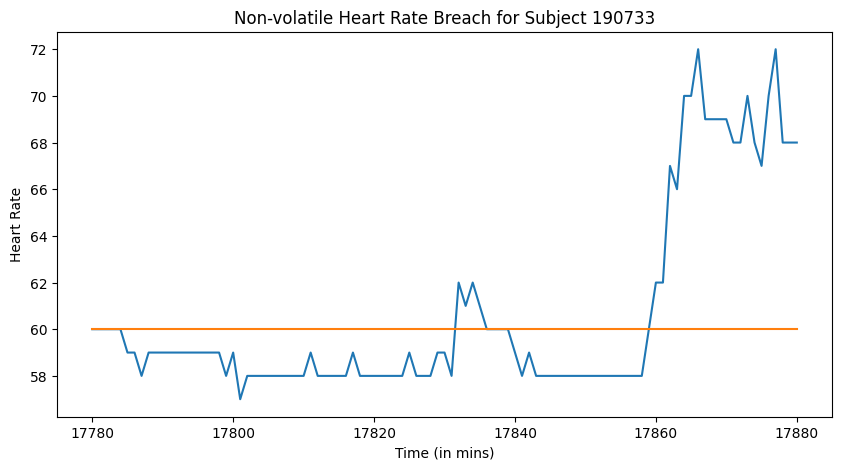

In [102]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.plot(df[(df["SUBJECT_ID"] == 190733) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] >= 17780) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] <= 17880)][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_VALUE"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.plot(df[(df["SUBJECT_ID"] == 190733) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] >= 17780) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] <= 17880)][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_THRESHOLD_VALUE_LOW"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.set_xlabel("Time (in mins)")
ax.set_ylabel("Heart Rate")
ax.set_title("Non-volatile Heart Rate Breach for Subject 190733")
plt.show()

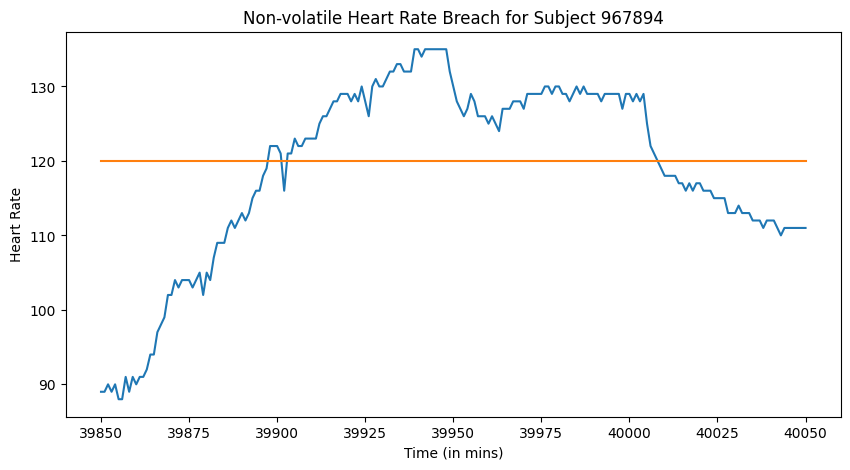

In [119]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.plot(df[(df["SUBJECT_ID"] == 967894) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] >= 39850) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] <= 40050)][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_VALUE"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.plot(df[(df["SUBJECT_ID"] == 967894) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] >= 39850) & (df["TIME_FROM_ADMITTANCE_IN_MINUTES"] <= 40050)][["TIME_FROM_ADMITTANCE_IN_MINUTES", "HEART_RATE_THRESHOLD_VALUE_HIGH"]].set_index("TIME_FROM_ADMITTANCE_IN_MINUTES"))
ax.set_xlabel("Time (in mins)")
ax.set_ylabel("Heart Rate")
ax.set_title("Non-volatile Heart Rate Breach for Subject 967894")
plt.show()

### Future Enhancements

- If a patient's heart rate increases or decreases by a significant amount (assumption: 10 bpm, but would need to confirm with medical professionals), crosses either the low or high threshold, and stays at that level or continues to increase (high threshold) or decrease (low threshold), I might consider that a non-volatile breach after 2 minutes, rather than the 3 minutes I assumed in the above analysis. I think in that case, the patient would be more at risk and would need help faster.
- As mentioned at the end of the "Data Preparation" section, I would investigate the missing values in blood pressure and consider analyzing it to augment decisions about heart rate.
- Refine assumptions for duration before calling a breach volatile or non-volatile (currently, 3 minutes).